## Processamento de Linguagem Natural
Rodrigo Baracho

In [1]:
import os
import pathlib
import time
import codecs
import string
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import urllib
import requests
from bs4 import BeautifulSoup

import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract

from IPython.core.display import Image
%matplotlib inline

In [11]:
import re
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en 
stopwords.extend([u'\n','-','','–','is', 'as', 'be'])

In [12]:
def limpa(text):
    list_words = text.split()
    list_words = [l.strip(string.punctuation) for l in list_words]
    list_words = [l.strip().lower() for l in list_words]
    list_words = [l.strip(string.punctuation) for l in list_words]
    list_words = [l for l in list_words if l not in stopwords]    
    input_text = ''
    input_text += ' '+l        
    return str(input_text+' | ')

In [13]:
def build_neighbors(word, model, nviz=10):
    g = nx.Graph()
    g.add_node(word)
    viz1 = model.wv.most_similar(word, topn=nviz)
    g.add_weighted_edges_from([(word, v, w) for v,w in viz1 if w> 0.5] )
    for v in viz1:
        g.add_weighted_edges_from([(v[0], v2, w2) for v2,w2 in model.wv.most_similar(v[0])])
    return g

In [14]:
def print_results(model, palavra):
    print(palavra)
    for result in model.wv.most_similar(palavra):
        print(result)
    print()

In [15]:
onlydirs = [f for f in os.listdir('.') if os.path.isdir(os.path.join('.',f)) and not f.startswith('.')]
corpuspath = 'pdf'

onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) and not f.startswith('.')]
onlydirs.sort()

lista = []
input_text = ''

for filename in [f for f in onlyfiles if f.endswith('pdf')]:
    text = textract.process(os.path.join(corpuspath,filename)).decode('utf-8')
    list_words = text.split('.')
    
    
    for l in list_words:  
        input_text += limpa(l) 
      


In [16]:
# Lista de sentenças
sentences_strings_ted = []
for line in input_text.split('|'):
    sentences_strings_ted.extend([line])
    
# tokenização
sentences_ted = []
for sent_str in sentences_strings_ted:
    tokens = sent_str.lower().split()
    sentences_ted.append(tokens)

In [17]:
from gensim.models import Word2Vec
#CBOW
model_0 = Word2Vec(sentences=sentences_ted, size=100, window=5, min_count=40, workers=4, sg=0)

#Skip-gram
model_1 = Word2Vec(sentences=sentences_ted, size=100, window=5, min_count=40, workers=4, sg=1)

In [19]:
print_results(model_0,'system')

system
('data', 0.9996309280395508)
('integrated', 0.9996269941329956)
('was', 0.9995971322059631)
('one', 0.9995923638343811)
('than', 0.9995843172073364)
('quality,', 0.9995719194412231)
('through', 0.9995675683021545)
('by', 0.9995641708374023)
('factor', 0.9995557069778442)
('analysis', 0.999550461769104)



In [22]:
print_results(model_0,'project')

project
('organization', 0.9995055794715881)
('its', 0.999463677406311)
('with', 0.9994587302207947)
('from', 0.9994535446166992)
('more', 0.9994428753852844)
('these', 0.9994312524795532)
('knowledge', 0.9994156360626221)
('must', 0.999413013458252)
('their', 0.9994122982025146)
('as', 0.9993990659713745)



## imprimindo: skip-gram 

In [23]:
model_1.wv.most_similar('integration')

[('these', 0.9938507080078125),
 ('for', 0.9933701753616333),
 ('their', 0.9918817281723022),
 ('and', 0.9916648864746094),
 ('to', 0.9913399815559387),
 ('in', 0.9905849695205688),
 ('must', 0.9902341365814209),
 ('can', 0.9876850843429565),
 ('companies', 0.9868011474609375),
 ('with', 0.986588180065155)]

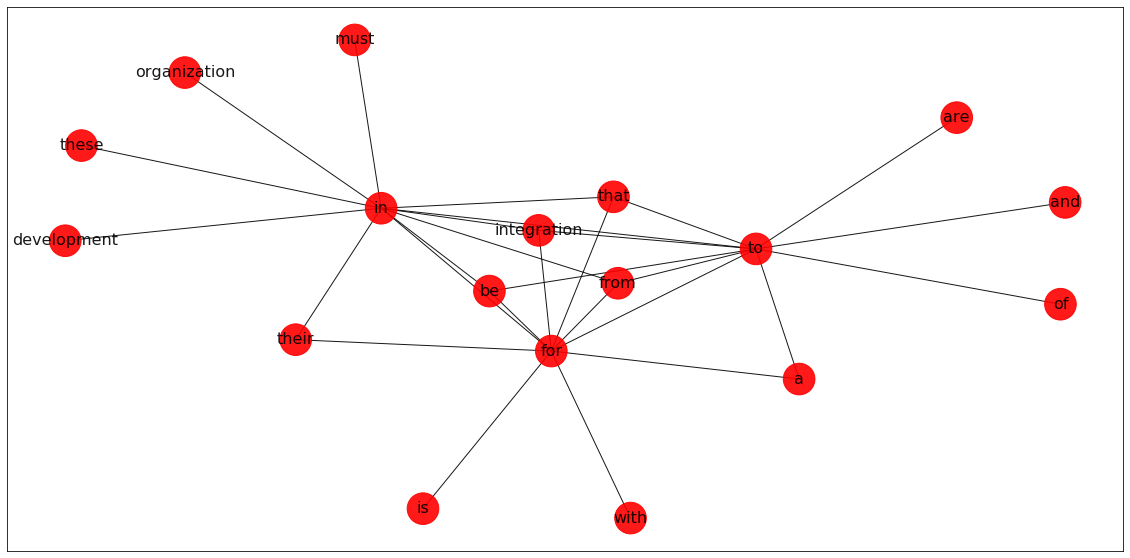

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
word = 'integration'

g = build_neighbors(word, model_0,3);
cols = ['r']*len(g.nodes()); 
pos = nx.spring_layout(g, iterations=300)
nx.draw_networkx(g, pos=pos, node_color=cols, node_size=1000, alpha=0.9, font_size= 16)

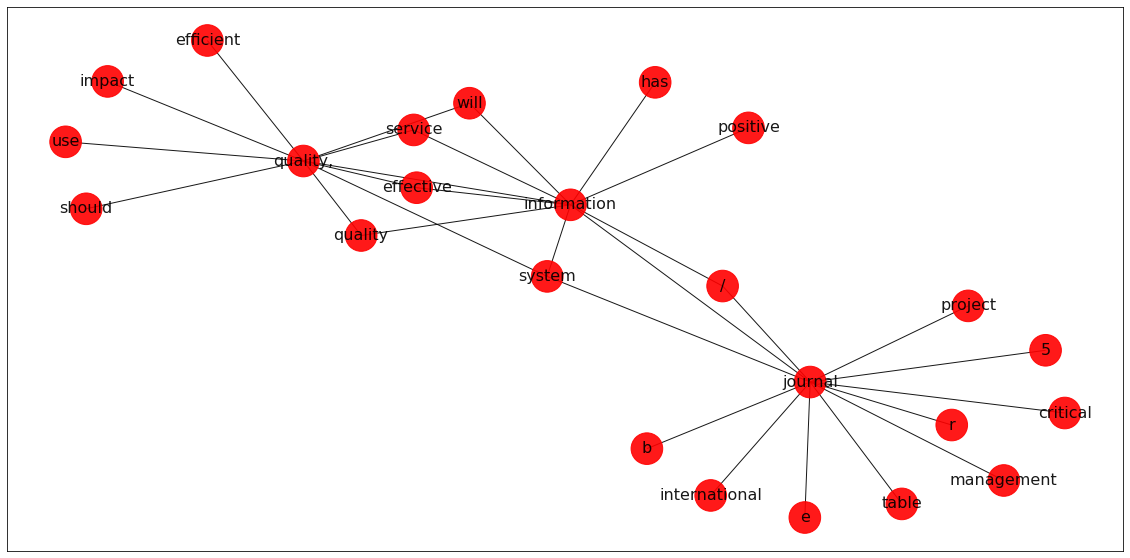

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
word = 'system'

g = build_neighbors(word, model_1,3);
cols = ['r']*len(g.nodes()); 

pos = nx.spring_layout(g, iterations=300)
nx.draw_networkx(g, pos=pos, node_color=cols, node_size=1000, alpha=0.9, font_size= 16)